<a href="https://colab.research.google.com/github/nikhilsojitra/Ethical_Issues_for_AI/blob/main/my_project_ehtical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fairness-Aware Credit Risk Prediction: An Analysis of Disparate Impact, Disparate Treatment, and Disparate Mistreatment Using the Credit Card Clients Dataset**

**Subject :** M515 Ethical Issues for AI (WS0925)

**Student Name :** Nikhil Ratilalbhai Sojitra

**Student ID :** GH1039510

**Github Link :** https://github.com/nikhilsojitra/Ethical_Issues_for_AI

**Dataset :** https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

## **Introduction**
Machine lerning systems are very used to support to take decision making in every sensitive domains like credit approvel. While theses system can be inhance and improve effcitivity and consistency, they also can take risk producing biesed and unfair result if historical data or modiling choice disadvantages certain demograpic groups

This project aim on to check and mitigating algorithm bies in a credit risk the objective is to evaluate either a machine lerning model produce unbalanced result for different demographic groups and to apply a fairness-aware approach to reduce such disparities

Ensuring fairness in automated credit decision is ethically imported and economically relevant unfair model may lead to discriminatory practice loss of customer trust and regulatory result therefore fairness must be considered alongside predictive performance when deploying machine lernaing model in real world application



## **Problem statement**
The goal of this project is to build a machine learning model which can predict whether a loan applicant is creditworthy based on historical application data. Such models are commonly used by financial institutions to support loan approval decisions.


This task is formulated as a binary classification problem where the model predicts a positive or negative credit outcome while predictive accuracy is important relaying solely on accuracy may lead to unfair decision that disproportionately affect certain groups

the main problem is that in project is whether a standard machine learning model produce biased outcome with respect to protected attribute such as gender , education level and marital status if bias is present the objective is to apply fairness aware technique to reduce while maintain acceptable predictive performance

## **Dataset Overview**

**Dataset source:** https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients


The Default of Credit Card Clients Dataset contains information about 30,000 credit card holders, including:

**Demographic features:**

  * Gender

  * Education level

  * Marital status

  * Age



**Financial features:**

  * credit limit
  * bill amounts
  * payment history



**Target variable:**

* DEFAULT (1 = default, 0 = no default)


**Protected attributes used for fairness analysis:**

  * Gender

  * Education level

  * Marital status

## **Setup and Imports**
This notebook value of fairness in credit default prediction using the credit card clients dataset. The protected attribute consider are sex, education, and marital status, consistent with fairness oriented dataset documentation. the analysis covers model performance and three discrimination notion : disparate impact , disparate treatment and disparate mistreatment.

In [46]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## **Import and Clean Data**
The dataset is loaded from CSV . Conversion artifacts are remove  (For example : reduce index columns and accidental header rows). Undefined categories in education and marital status are mapped to other to preserve data completeness and avoid creating extremely small demographics groups.

In [47]:
# Import CSV
df = pd.read_csv("/content/default of credit card clients.csv")

# Drop extra index column
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Rename X1-X23 and Y to meaningful names
col_map = {
    "X1": "LIMIT_BAL",
    "X2": "SEX",
    "X3": "EDUCATION",
    "X4": "MARRIAGE",
    "X5": "AGE",
    "X6": "PAY_0",
    "X7": "PAY_2",
    "X8": "PAY_3",
    "X9": "PAY_4",
    "X10": "PAY_5",
    "X11": "PAY_6",
    "X12": "BILL_AMT1",
    "X13": "BILL_AMT2",
    "X14": "BILL_AMT3",
    "X15": "BILL_AMT4",
    "X16": "BILL_AMT5",
    "X17": "BILL_AMT6",
    "X18": "PAY_AMT1",
    "X19": "PAY_AMT2",
    "X20": "PAY_AMT3",
    "X21": "PAY_AMT4",
    "X22": "PAY_AMT5",
    "X23": "PAY_AMT6",
    "Y": "DEFAULT"
}
df = df.rename(columns=col_map)

# Remove “fake header row” if present
df["LIMIT_BAL"] = pd.to_numeric(df["LIMIT_BAL"], errors="coerce")
df = df[df["LIMIT_BAL"].notna()].copy()

# Convert key columns to numeric
for c in ["SEX", "EDUCATION", "MARRIAGE", "AGE", "DEFAULT"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Clean invalid categories:
df["EDUCATION"] = df["EDUCATION"].replace({0: 4, 5: 4, 6: 4})
df["MARRIAGE"]  = df["MARRIAGE"].replace({0: 3})

sex_map = {1: "Male", 2: "Female"}
edu_map = {1: "GradSchool", 2: "University", 3: "HighSchool", 4: "Other"}
mar_map = {1: "Married", 2: "Single", 3: "Other"}

df["SEX_G"] = df["SEX"].map(sex_map)
df["EDU_G"] = df["EDUCATION"].map(edu_map)
df["MAR_G"] = df["MARRIAGE"].map(mar_map)

print(df.shape)
print(df[["SEX","EDUCATION","MARRIAGE","DEFAULT"]].isna().sum())
print(df["EDUCATION"].value_counts().sort_index())
print(df["MARRIAGE"].value_counts().sort_index())


(30000, 27)
SEX          0
EDUCATION    0
MARRIAGE     0
DEFAULT      0
dtype: int64
EDUCATION
1    10585
2    14030
3     4917
4      468
Name: count, dtype: int64
MARRIAGE
1    13659
2    15964
3      377
Name: count, dtype: int64


## **Exploratory Data Analysis**
Exploratory Data Analysis is make to understand whole structured of dataset , identify the strong data quality issues and identify the pattern related to sensitive attribute such as gender, education level and martial status

Since this project focuses on ethical issues and fairness in machine learning, EDA plays a crucial role in revealing pre existing bias in the data, which may later propagate into the predictions of machine learning models. The dataset used is the Default of Credit Card Clients dataset introduced by Yeh & Lien (2009), which contains demographic, financial, and repayment history attributes of credit card holders in Taiwan.

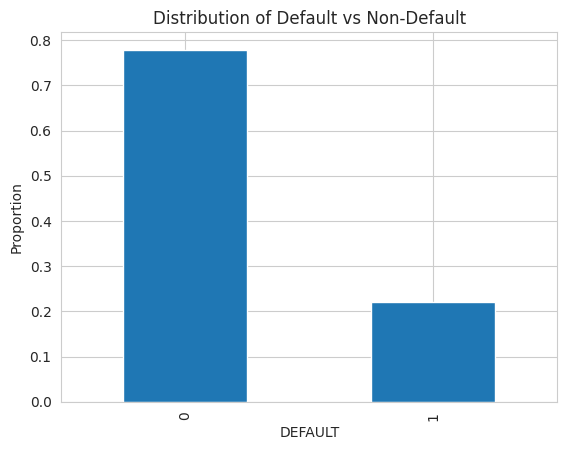

In [48]:
#Distribution of default vs non-default
df["DEFAULT"].value_counts(normalize=True).plot(kind="bar")
plt.title("Distribution of Default vs Non-Default")
plt.ylabel("Proportion")
plt.show()



## **Output**
The dataset is uncertain with significantly more non-default cases than default cases. This uncertain can be bias machine lerning models towards the majority class and may be affect minority or protected groups

## **Sensitive attribute distributions**

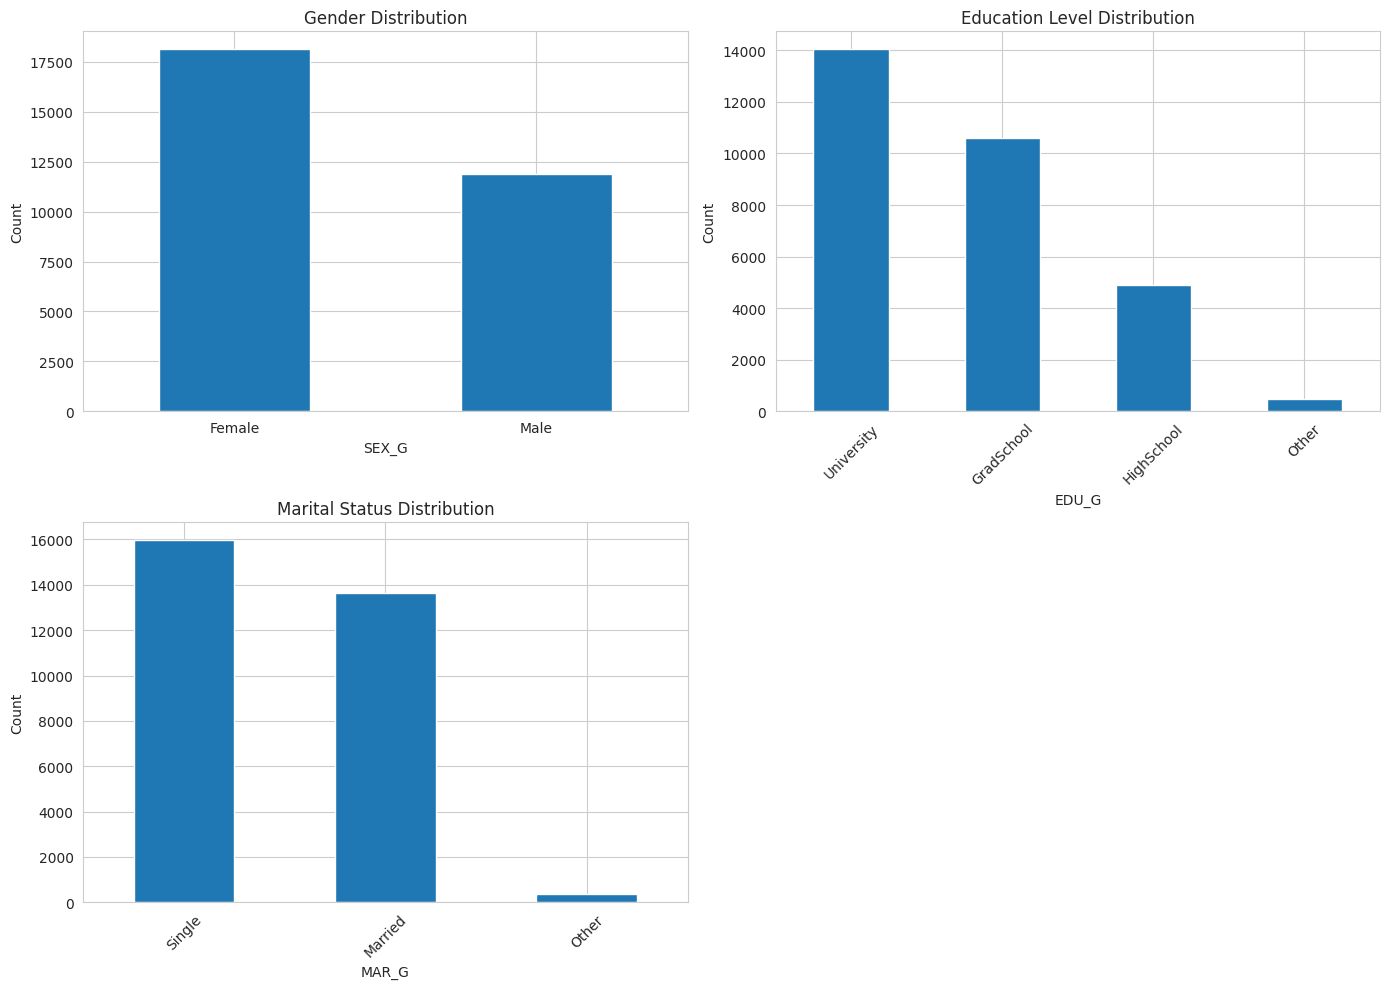

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gender Distribution
df["SEX_G"].value_counts().plot(kind="bar", ax=axes[0, 0])
axes[0, 0].set_title("Gender Distribution")
axes[0, 0].set_ylabel("Count")
axes[0, 0].tick_params(axis="x", rotation=0)


# Education Distribution
df["EDU_G"].value_counts().plot(kind="bar", ax=axes[0, 1])
axes[0, 1].set_title("Education Level Distribution")
axes[0, 1].set_ylabel("Count")
axes[0, 1].tick_params(axis="x", rotation=45)


# Marital Status Distribution
df["MAR_G"].value_counts().plot(kind="bar", ax=axes[1, 0])
axes[1, 0].set_title("Marital Status Distribution")
axes[1, 0].set_ylabel("Count")
axes[1, 0].tick_params(axis="x", rotation=45)


# Empty Plot
axes[1, 1].axis("off")


plt.tight_layout()
plt.show()


## **Default rate by protected groups**

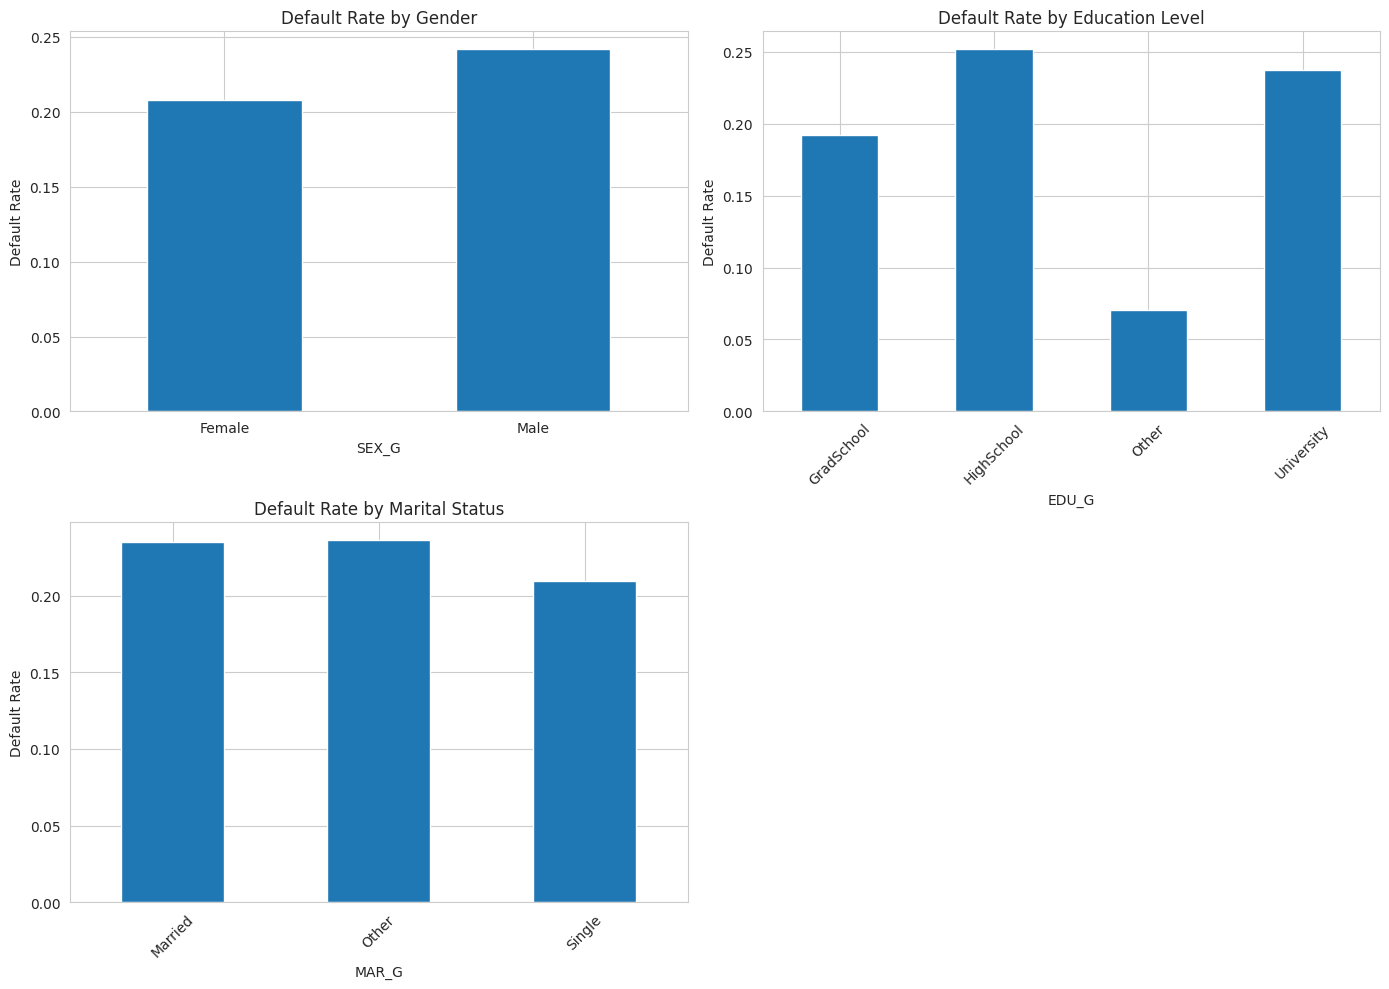

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# Default Rate by Gender
df.groupby("SEX_G")["DEFAULT"].mean().plot(kind="bar", ax=axes[0, 0])
axes[0, 0].set_title("Default Rate by Gender")
axes[0, 0].set_ylabel("Default Rate")
axes[0, 0].tick_params(axis="x", rotation=0)


# Default Rate by Education
df.groupby("EDU_G")["DEFAULT"].mean().plot(kind="bar", ax=axes[0, 1])
axes[0, 1].set_title("Default Rate by Education Level")
axes[0, 1].set_ylabel("Default Rate")
axes[0, 1].tick_params(axis="x", rotation=45)


# Default Rate by Marital Status
df.groupby("MAR_G")["DEFAULT"].mean().plot(kind="bar", ax=axes[1, 0])
axes[1, 0].set_title("Default Rate by Marital Status")
axes[1, 0].set_ylabel("Default Rate")
axes[1, 0].tick_params(axis="x", rotation=45)


axes[1, 1].axis("off")


plt.tight_layout()
plt.show()


### **Output**
The observed differences in default rate across gender , education and martial status suggest the presence of historical and societal bias connected in dataset. If lest unaddressed machine learning models trained on this data may produce outcome.

## **Define Features, Split Data, Define Models**

the supervised task is binary classification where DEFAULT=1 indicate default next month three model are trained : logistic regression , decision tree and random forest to reduce the risk of dispate treatment the primary models are trained without protected attribute (gender , education , marriage) while these attribute are keep only for fairness evaluation.

In [51]:
target_col = "DEFAULT"

protected_label_cols = ["SEX_G", "EDU_G", "MAR_G"]

# Features WITHOUT protected attributes
features_without_pa = [
    "LIMIT_BAL", "AGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

X = df[features_without_pa + protected_label_cols].copy()
y = df[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=300)
}


## **Disparate Impact**

Disparate impact is computing using the favorable outcome defined as non default (DEFAULT = 0). This start check evaluates whether the dataset labels themselves show group outcome differences before any model is applied.

In [52]:
def disparate_impact_labels(
    df,
    group_col,
    privileged,
    unprivileged,
    target="DEFAULT",
    favorable_value=0
):
    p_priv = (
        df[df[group_col] == privileged][target]
        .eq(favorable_value)
        .mean()
    )

    p_unpriv = (
        df[df[group_col].isin(unprivileged)][target]
        .eq(favorable_value)
        .mean()
    )

    di = p_unpriv / p_priv if p_priv > 0 else np.nan
    return di, p_unpriv, p_priv


def print_disparate_impact(
    attribute,
    privileged_group,
    unprivileged_group,
    di,
    p_unpriv,
    p_priv
):
    print("=" * 65)
    print(f"Protected Attribute : {attribute}")
    print(f"Privileged Group    : {privileged_group}")
    print(f"Unprivileged Group  : {unprivileged_group}")
    print("-" * 65)
    print(f"Favorable Outcome Rate ({unprivileged_group}): {p_unpriv:.2%}")
    print(f"Favorable Outcome Rate ({privileged_group})  : {p_priv:.2%}")
    print(f"Disparate Impact ({unprivileged_group}/{privileged_group}): {di:.3f}")
    print("=" * 65)
    print()


# Gender
di_g, p_f, p_m = disparate_impact_labels(
    df,
    group_col="SEX_G",
    privileged="Male",
    unprivileged=["Female"]
)

print_disparate_impact(
    attribute="Gender",
    privileged_group="Male",
    unprivileged_group="Female",
    di=di_g,
    p_unpriv=p_f,
    p_priv=p_m
)



# Education
di_e, p_low, p_high = disparate_impact_labels(
    df,
    group_col="EDU_G",
    privileged="University",
    unprivileged=["HighSchool", "Other"]
)

print_disparate_impact(
    attribute="Education Level",
    privileged_group="University",
    unprivileged_group="Lower Education",
    di=di_e,
    p_unpriv=p_low,
    p_priv=p_high
)


# Marital Status
di_mar, p_unm, p_mar = disparate_impact_labels(
    df,
    group_col="MAR_G",
    privileged="Married",
    unprivileged=["Single", "Other"]
)

print_disparate_impact(
    attribute="Marital Status",
    privileged_group="Married",
    unprivileged_group="Unmarried",
    di=di_mar,
    p_unpriv=p_unm,
    p_priv=p_mar
)



Protected Attribute : Gender
Privileged Group    : Male
Unprivileged Group  : Female
-----------------------------------------------------------------
Favorable Outcome Rate (Female): 79.22%
Favorable Outcome Rate (Male)  : 75.83%
Disparate Impact (Female/Male): 1.045

Protected Attribute : Education Level
Privileged Group    : University
Unprivileged Group  : Lower Education
-----------------------------------------------------------------
Favorable Outcome Rate (Lower Education): 76.42%
Favorable Outcome Rate (University)  : 76.27%
Disparate Impact (Lower Education/University): 1.002

Protected Attribute : Marital Status
Privileged Group    : Married
Unprivileged Group  : Unmarried
-----------------------------------------------------------------
Favorable Outcome Rate (Unmarried): 79.01%
Favorable Outcome Rate (Married)  : 76.53%
Disparate Impact (Unmarried/Married): 1.032



### **Output**
For gender the favorable result is 79.2% for female and 75.8% for males resulting in a disparate impact of 1.04. for education , low education and high educational groups have almost identify favor outcome rate (76.4% vs. 76.3%), with disparate impact of 1.00 for martial status , unmarried application receive favorable outcome at a rate of 79.0% compared to 76.5% for married appiicats giving a disparate impact of 1.03 all disparate impact values are close to the ideal value of 1 and well above the 0.8 threehold , indicating no evidence of disparate impact across gender , education or marital status.

## **Disparate Treatment**
Disparate treatment is conduct by comparaing model behavior when protected attribute are include and excluded if there are any data of the predictive performance is similar without protected attribute theier inclusion is hard to justify and may enable to navigate the direct discrimination.

In [53]:
# Feature sets
protected_attrs = ["SEX", "EDUCATION", "MARRIAGE"]
features_with_pa = features_without_pa + protected_attrs

# Ensure protected attributes are numeric
df_num = df.copy()
df_num[protected_attrs] = df_num[protected_attrs].apply(
    pd.to_numeric, errors="coerce"
)

X_with_pa = df_num[features_with_pa]
X_without_pa = df_num[features_without_pa]
y = df_num["DEFAULT"].astype(int)


# Train-test split
Xw_train, Xw_test, yw_train, yw_test = train_test_split(
    X_with_pa, y, test_size=0.30, random_state=42, stratify=y
)

Xn_train, Xn_test, yn_train, yn_test = train_test_split(
    X_without_pa, y, test_size=0.30, random_state=42, stratify=y
)


# Logistic Regression models
lr_with_pa = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

lr_without_pa = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train models
lr_with_pa.fit(Xw_train, yw_train)
lr_without_pa.fit(Xn_train, yn_train)


# Evaluation
acc_with_pa = accuracy_score(yw_test, lr_with_pa.predict(Xw_test))
acc_without_pa = accuracy_score(yn_test, lr_without_pa.predict(Xn_test))

print("=" * 60)
print("Logistic Regression Accuracy Comparison")
print("-" * 60)
print(f"WITH protected attributes    : {acc_with_pa:.4f}")
print(f"WITHOUT protected attributes : {acc_without_pa:.4f}")
print("=" * 60)

Logistic Regression Accuracy Comparison
------------------------------------------------------------
WITH protected attributes    : 0.8079
WITHOUT protected attributes : 0.8086


### **Output**

The Logistic Regression model achieved similar accuracy with (0.8079) and without (0.8086) protected attributes. the minor difference show that protected attribute do not contribute meaningful predictive value therefore excluding these attiribute preserve model performance while reducing direct realience on sensitive demogoraphics information supporting more ethical model design.

## **Disparate Impact and Disparate Mistreatment on Model Predictions**

In [54]:
def disparate_impact_from_predictions(
    df,
    group_col,
    privileged,
    unprivileged,
    target_pred="y_pred",
    favorable_value=0
):
    p_priv = (
        df[df[group_col] == privileged][target_pred]
        .eq(favorable_value)
        .mean()
    )

    p_unpriv = (
        df[df[group_col].isin(unprivileged)][target_pred]
        .eq(favorable_value)
        .mean()
    )

    di = p_unpriv / p_priv if p_priv > 0 else np.nan
    return di, p_unpriv, p_priv

def false_positive_negative_rates(df, group_col, group_value, true_col='y_true', pred_col='y_pred', positive_label=1):
    group_df = df[df[group_col] == group_value]

    if group_df.empty:
        return np.nan, np.nan

    true_positives = ((group_df[pred_col] == positive_label) & (group_df[true_col] == positive_label)).sum()
    false_positives = ((group_df[pred_col] == positive_label) & (group_df[true_col] != positive_label)).sum()
    true_negatives = ((group_df[pred_col] != positive_label) & (group_df[true_col] != positive_label)).sum()
    false_negatives = ((group_df[pred_col] != positive_label) & (group_df[true_col] == positive_label)).sum()

    # Calculate FPR
    fpr = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else np.nan

    # Calculate FNR
    fnr = false_negatives / (false_negatives + true_positives) if (false_negatives + true_positives) > 0 else np.nan

    return fpr, fnr

def evaluate_model(model_name, model):
    model.fit(X_train[features_without_pa], y_train)
    y_pred = model.predict(X_test[features_without_pa]).astype(int)

    df_eval = X_test[protected_label_cols].copy()
    df_eval["y_true"] = y_test.values
    df_eval["y_pred"] = y_pred

    accuracy = accuracy_score(y_test, y_pred)

    di_gender, _, _ = disparate_impact_from_predictions(df_eval, "SEX_G", "Male", ["Female"])
    di_education, _, _ = disparate_impact_from_predictions(df_eval, "EDU_G", "University", ["HighSchool", "Other"])
    di_marriage, _, _ = disparate_impact_from_predictions(df_eval, "MAR_G", "Married", ["Single", "Other"])

    fpr_m, fnr_m = false_positive_negative_rates(df_eval, "SEX_G", "Male")
    fpr_f, fnr_f = false_positive_negative_rates(df_eval, "SEX_G", "Female")

    fpr_hs, fnr_hs = false_positive_negative_rates(df_eval, "EDU_G", "HighSchool")
    fpr_uni, fnr_uni = false_positive_negative_rates(df_eval, "EDU_G", "University")

    fpr_mar, fnr_mar = false_positive_negative_rates(df_eval, "MAR_G", "Married")
    fpr_sing, fnr_sing = false_positive_negative_rates(df_eval, "MAR_G", "Single")

    return {
        "model": model_name,
        "accuracy": accuracy,
        "DI_gender": di_gender,
        "DI_education": di_education,
        "DI_marriage": di_marriage,
        "Gender_FPR_M": fpr_m, "Gender_FNR_M": fnr_m,
        "Gender_FPR_F": fpr_f, "Gender_FNR_F": fnr_f,
        "Edu_FPR_HS": fpr_hs, "Edu_FNR_HS": fnr_hs,
        "Edu_FPR_Uni": fpr_uni, "Edu_FNR_Uni": fnr_uni,
        "Mar_FPR_Married": fpr_mar, "Mar_FNR_Married": fnr_mar,
        "Mar_FPR_Single": fpr_sing, "Mar_FNR_Single": fnr_sing,
    }

For each model we report predictive accuracy and evaluate disparate impact on prediction (favourable outcome= predicted non default) and disparate mistreatment via group level false positive and false negative rates of dataset.


this function evaluate trained classification model using both are performance and fairness of the criteria the model is trained without protected to avoid explicates dispute treatment and prediction are generated on a held out test set model performance is measured using specific error rate (False Positive Rate and False Negative Rate) across gender , education and martial status the function return all metrics in structured format.

## **Evaluate all models and collect results**

In [ ]:
# Evaluate all models and collect results
results = [
    evaluate_model(model_name, model)
    for model_name, model in models.items()
    ]

results_df = pd.DataFrame(results)
results_df

## **Model Performance and Fairness Evaluation Graphs**

This section can make consolidated visual comparison of the evaluated machine learning model use both performance and fairness metrics the first plot show the overall of the predictive accuracy of each model providing baseline of the comparison classification performance the second plot report the disparate impact values across multiple protected attribute (gender, education, and marital status), highlighting potential group level bies in model predication

The third and fourth plots focus on Disparate Mistreatment by examining gender based False Positive Rates (FPR) and False Negative Rates (FNR), respectively. these error rate is comparisons reveal wheather different demographics groups are unequal of misclassification risks.


To gether these visualization enable a holistic assessment of the trade off between model accuracy and fairness supporting informed and ethically grounded model selection.

In [ ]:
df_plot = results_df.set_index("model")

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# Accuracy
df_plot["accuracy"].plot(kind="bar", ax=axes[0, 0])
axes[0, 0].set_title("Model Accuracy Comparison")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].tick_params(axis="x", rotation=45)


# Disparate Impact
df_plot[["DI_gender", "DI_education", "DI_marriage"]].plot(
    kind="bar", ax=axes[0, 1]
)
axes[0, 1].axhline(0.8, linestyle="--")
axes[0, 1].set_title("Disparate Impact Across Models")
axes[0, 1].set_ylabel("Disparate Impact")
axes[0, 1].tick_params(axis="x", rotation=45)


# False Positive Rate of Gender
df_plot[["Gender_FPR_M", "Gender_FPR_F"]].plot(
    kind="bar", ax=axes[1, 0]
)
axes[1, 0].set_title("False Positive Rate by Gender")
axes[1, 0].set_ylabel("False Positive Rate")
axes[1, 0].tick_params(axis="x", rotation=45)


# False Negative Rate of Gender
df_plot[["Gender_FNR_M", "Gender_FNR_F"]].plot(
    kind="bar", ax=axes[1, 1]
)
axes[1, 1].set_title("False Negative Rate by Gender")
axes[1, 1].set_ylabel("False Negative Rate")
axes[1, 1].tick_params(axis="x", rotation=45)


# Adjust layout
plt.tight_layout()
plt.show()


## **Conclusion**

This assessment evaluated fairness in credit default predication models by analyzing both accurancy and fairness metrics the results show that the model perform well while distributing favorable outcome fairly across gender , education , and marital status this indicate that evaluating fairness alongside accurancy is important when using machine lerning in financial decision making.

## **Limitations**

This analysis aim on a limited number of protected attribute and used group level fairness metric it did not examine effect or individuals level fairness in addition the study was based on single database which may contain historical biases.

## **Future Improvements**

Future work can include more protected attribute intersectional fairness analysis and additional bias mitigation method testing the model on different database and real word scenario would also improve the relabilities of the result.